In [32]:
%matplotlib inline

In [130]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib
matplotlib.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [146]:
papers_2012 = pd.read_csv('papers_2012.csv', parse_dates=True)
papers_2013 = pd.read_csv('papers_2013.csv', parse_dates=True)
papers_2014 = pd.read_csv('papers_2014.csv', parse_dates=True)
papers_2015 = pd.read_csv('papers_2015.csv', parse_dates=True)
papers_2016 = pd.read_csv('papers_2016.csv', parse_dates=True)
frames = [papers_2012, papers_2013, papers_2014, papers_2015, papers_2016]
df = pd.concat(frames)
df['created'] = pd.to_datetime(df['created'], format = "%Y-%m-%d")
df.drop('Unnamed: 0', 1, inplace=True)

In [147]:
df.describe()

,title,abstract,categories,created,id,doi
count,88618,88618,88618,88618,88618,16458
unique,88509,88545,10125,3598,88618,16406
top,Discussion: Latent variable graphical model se...,This paper has been withdrawn by the author.,"[cs.IT, math.IT]",2013-03-27 00:00:00,1605.05610,10.1145/1235
freq,4,4,8632,331,1,6
first,NaN,NaN,NaN,1993-11-30 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-11-07 00:00:00,NaN,NaN


In [148]:
df.head()

,title,abstract,categories,created,id,doi
0,Geometric Complexity Theory V: On deciding non...,This article has been withdrawn because it has...,[cs.CC],2007-04-02,0704.0213,NaN
1,Hybrid-ARQ in Multihop Networks with Opportuni...,This paper develops a contention-based opportu...,"[cs.IT, math.IT]",2007-04-05,0704.0802,NaN
2,Opportunistic Relay Selection with Limited Fee...,It has been shown that a decentralized relay s...,"[cs.IT, math.IT]",2007-04-05,0704.0805,NaN
3,Preconditioned Temporal Difference Learning,This paper has been withdrawn by the author. T...,"[cs.LG, cs.AI]",2007-04-11,0704.1409,NaN
4,Optimum Linear LLR Calculation for Iterative D...,On a fading channel with no channel state info...,"[cs.IT, math.IT]",2007-04-18,0704.2452,10.1109/ISIT.2007.4557204


In [149]:
per_year_df = pd.DataFrame(df.groupby(df.created.map(lambda x: x.year)).id.count())
per_year_df.columns = ['count']

In [159]:
per_year_df[:12].T

created,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
count,2,22,88,25,15,21,13,20,26,59,37,63


In [160]:
per_year_df[12:].T

created,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,135,220,167,294,618,1650,3229,12337,14909,16278,18791,19599


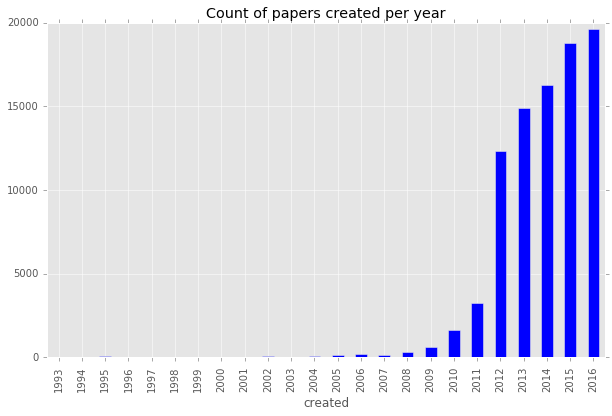

In [115]:
per_year_df.plot(kind='bar', figsize=(10, 6)).set_title('Count of papers created per year')

In [105]:
per_category = Counter()
for index, row in df.iterrows():
    categories = row['categories'].replace('[', '').replace(']', '').split(',')
    for c in categories:
        per_category[c.strip()] += 1

In [106]:
per_category_df = pd.DataFrame.from_dict(per_category, orient='index')
per_category_df.columns = ['count']

In [107]:
sorted_categories_df = per_category_df.sort(['count'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [108]:
sorted_categories_df.describe()

,count
count,152.000000
mean,1119.394737
std,2312.446550
min,1.000000
25%,33.750000
50%,152.000000
75%,886.000000
max,14414.000000


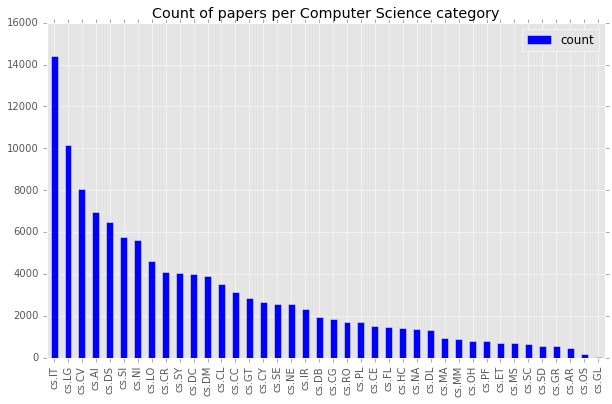

In [178]:
sorted_categories_df[sorted_categories_df.index.str.startswith('cs.') == True] \
.plot(kind='bar', figsize=(10, 6)).set_title('Count of papers per Computer Science category')

In [109]:
sorted_categories_df[:10]

,count
math.IT,14414
cs.IT,14414
cs.LG,10155
cs.CV,8055
cs.AI,6934
cs.DS,6456
stat.ML,5838
cs.SI,5761
cs.NI,5602
cs.LO,4607


In [161]:
sorted_categories_df

,count
math.IT,14414
cs.IT,14414
cs.LG,10155
cs.CV,8055
cs.AI,6934
cs.DS,6456
stat.ML,5838
cs.SI,5761
cs.NI,5602
cs.LO,4607


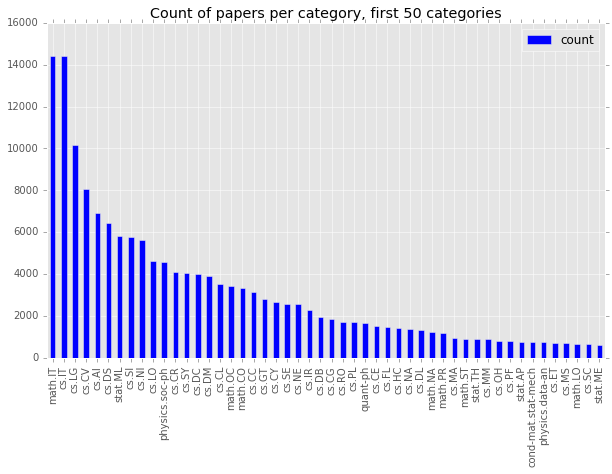

In [114]:
sorted_categories_df[:50].plot(kind='bar', figsize=(10, 6)).set_title('Count of papers per category, first 50 categories')
#Computer science categories
# cs.AR	Computer Science - Architecture
# cs.AI	Computer Science - Artificial Intelligence
# cs.CL	Computer Science - Computation and Language
# cs.CC	Computer Science - Computational Complexity
# cs.CE	Computer Science - Computational Engineering; Finance; and Science
# cs.CG	Computer Science - Computational Geometry
# cs.GT	Computer Science - Computer Science and Game Theory
# cs.CV	Computer Science - Computer Vision and Pattern Recognition
# cs.CY	Computer Science - Computers and Society
# cs.CR	Computer Science - Cryptography and Security
# cs.DS	Computer Science - Data Structures and Algorithms
# cs.DB	Computer Science - Databases
# cs.DL	Computer Science - Digital Libraries
# cs.DM	Computer Science - Discrete Mathematics
# cs.DC	Computer Science - Distributed; Parallel; and Cluster Computing
# cs.GL	Computer Science - General Literature
# cs.GR	Computer Science - Graphics
# cs.HC	Computer Science - Human-Computer Interaction
# cs.IR	Computer Science - Information Retrieval
# cs.IT	Computer Science - Information Theory
# cs.LG	Computer Science - Learning
# cs.LO	Computer Science - Logic in Computer Science
# cs.MS	Computer Science - Mathematical Software
# cs.MA	Computer Science - Multiagent Systems
# cs.MM	Computer Science - Multimedia
# cs.NI	Computer Science - Networking and Internet Architecture
# cs.NE	Computer Science - Neural and Evolutionary Computing
# cs.NA	Computer Science - Numerical Analysis
# cs.OS	Computer Science - Operating Systems
# cs.OH	Computer Science - Other
# cs.PF	Computer Science - Performance
# cs.PL	Computer Science - Programming Languages
# cs.RO	Computer Science - Robotics
# cs.SE	Computer Science - Software Engineering
# cs.SD	Computer Science - Sound
# cs.SC	Computer Science - Symbolic Computation

In [183]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk.stem as stem

porter = stem.PorterStemmer()
def tokenize(text):
    return [porter.stem(token) for token in simple_preprocess(text) if token not in STOPWORDS]

tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
stops = [word for word in stopwords.words('english')]
stops += ["=", "->", ".", ","]

word_counter = Counter()
for index, row in df.iterrows():
    tokens = tokenize(row['abstract'])
    for t in tokens:
        token = t.lower()
        if token not in stops:
            word_counter[token] += 1

word_counter.most_common(n=10)

[(u'algorithm', 66977),
 (u'model', 63981),
 (u'network', 60412),
 (u'problem', 60107),
 (u'propos', 51247),
 (u'base', 50325),
 (u'paper', 48036),
 (u'result', 47903),
 (u'data', 46829),
 (u'method', 44213)]

In [184]:
words_df = pd.DataFrame.from_dict(word_counter, orient='index')
words_df.columns = ['count']

In [185]:
first_words_df = words_df.sort_values(by=['count'], ascending=False)[:50]

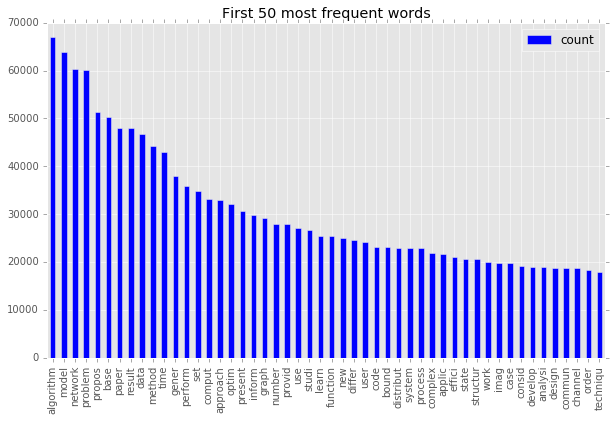

In [186]:
first_words_df.plot(kind='bar', figsize=(10, 6)).set_title("First 50 most frequent words")